######El objetivo del TP es aplicar los temas vistos en Machine Learning 1. Se hará un análisis exploratorio, luego una ingeniería de features y por último la aplicacion de los modelos vistos en clase: Regresión Lineal y Logísitica, Random Forest y K-means.

En cuanto al dataset, el mismo fue elegido por tratar un tema vinculado con el TP Integrador de la Especialización. Trata sobre el vínculo potencial entre las notas de estudiantes en 3 materias distintas, en relación a varios aspectos que caracterizan a cada estudiante.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



##Sobre el Dataset

Cargamos el dataset y visualizamos lo que tenemos

In [ ]:
path = '/content/drive/MyDrive/1 - Especialización IA/Machine Learning 1/StudentsPerformance.csv'
data = pd.read_csv(path)
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
print(data.shape)

(1000, 8)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No hay columnas nulas

In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
#valores únicos en cada columna categórica
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

##Estadística Descriptiva

####A continuación, vemos el porcentaje que tiene cada valor único para cada feature categórica para familiarizarnos con la información



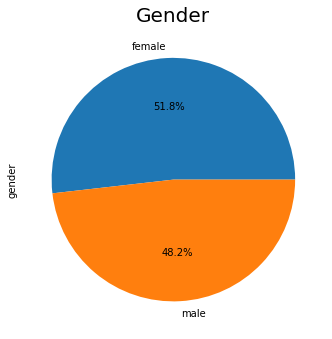

In [ ]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Gender',fontsize = 20)
data['gender'].value_counts().plot.pie(autopct="%1.1f%%")

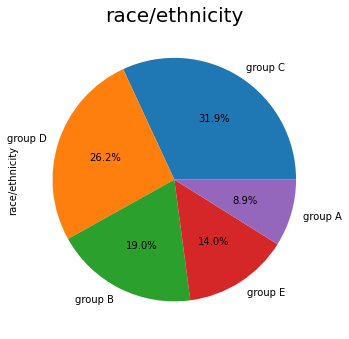

In [ ]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('race/ethnicity',fontsize = 20)
data['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")

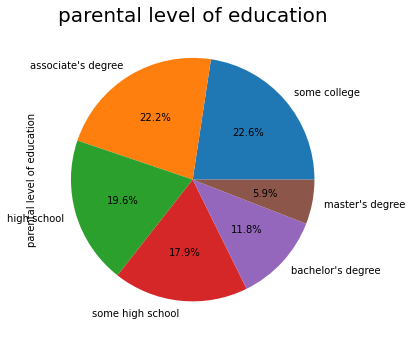

In [ ]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('parental level of education',fontsize = 20)
data['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")

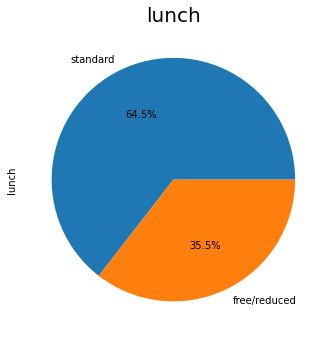

In [ ]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('lunch',fontsize = 20)
data['lunch'].value_counts().plot.pie(autopct="%1.1f%%")

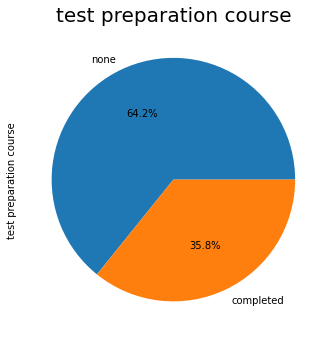

In [ ]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('test preparation course',fontsize = 20)
data['test preparation course'].value_counts().plot.pie(autopct="%1.1f%%")

####Ahora vemos como es la distribucion aproximada de las variables que se buscan predecir: math, reading and writing score

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

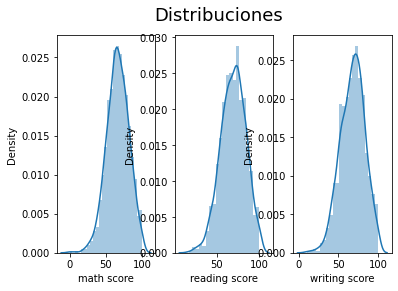

In [ ]:
plt.subplot(1, 3, 1)
sns.distplot(data['math score'])

plt.subplot(1, 3, 2)
sns.distplot(data['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(data['writing score'])

plt.suptitle('Distribuciones', fontsize = 18)
plt.show()

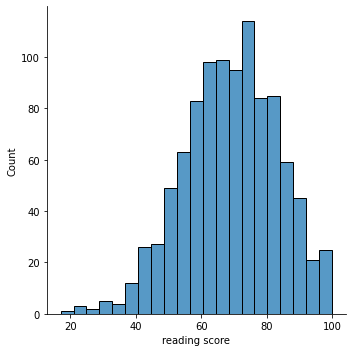

In [ ]:
sns.displot(data, x="reading score")

Conclusiones:

*   parecerían ser distribuciones normales
*   No presentan asimetría

Vemos qué sucede si segmentamos por sexo:



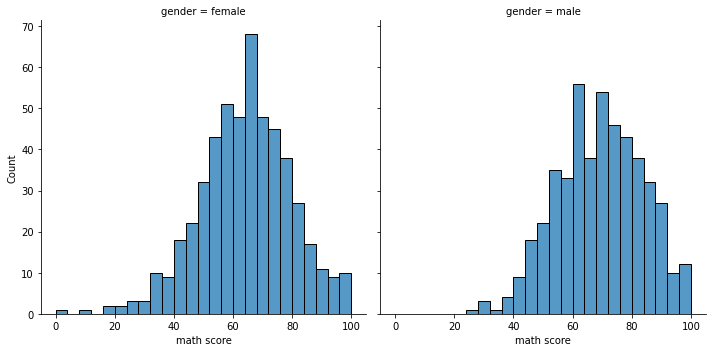

In [ ]:
sns.displot(data, x="math score", col="gender")

Conclusion: 


1.   parecería mantenerse la distribucion, por lo menos para la feature (sexo) y variable (math score) analizadas




####Ahora analizamos posibles correlaciones entre las variables de salida

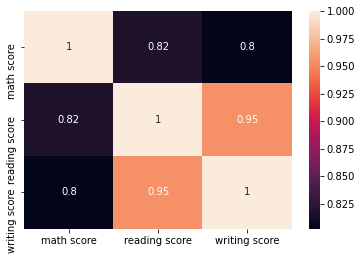

In [ ]:
correlation = data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

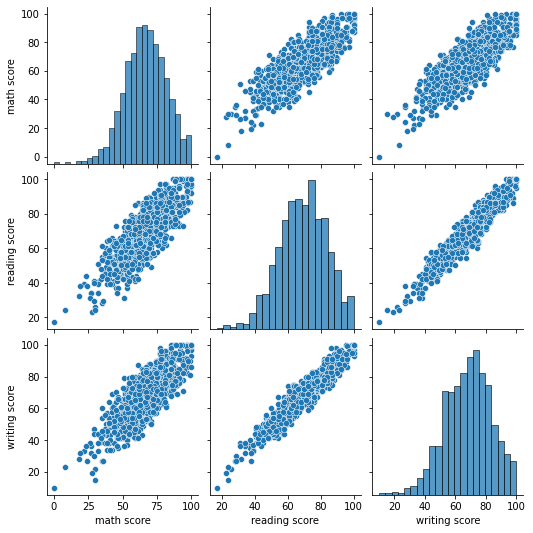

In [ ]:
sns.pairplot(data)

Conclusiones:


*   A los estudiantes que mejor les va en una materia, tambien les va mejor en otra.
*   La correlacion más alta se da entre writing y reading scores, y la más baja entre math y writing. Esto lo apreciamos visualizando la dispersión de la nube de puntos



####Ahora, graficamos vinculos entre las variables categórias y las variables de salida

Text(0.5, 1.0, 'Score in respect lunch')

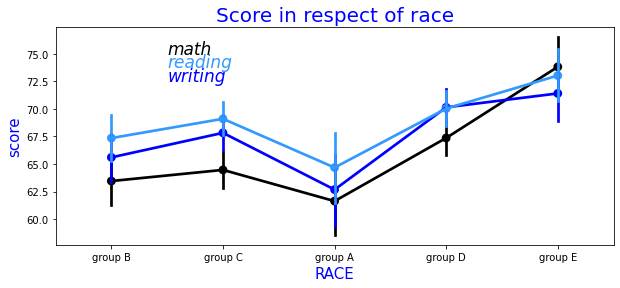

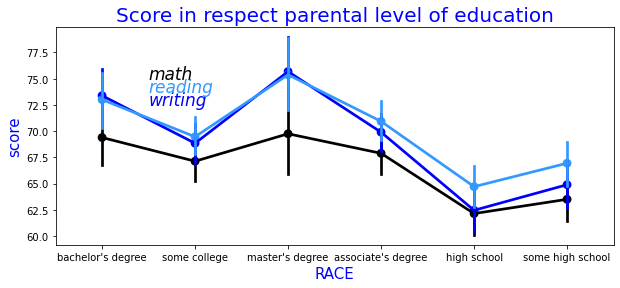

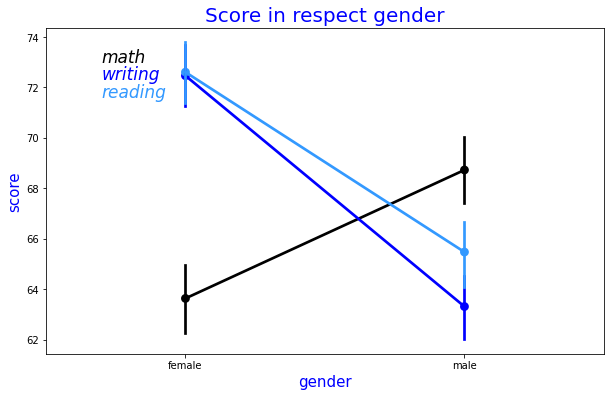

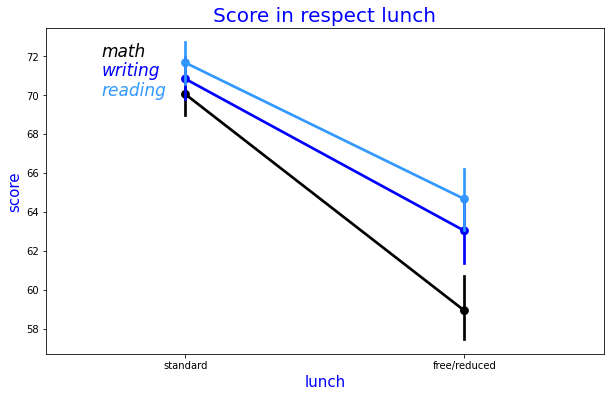

In [ ]:
#según race
f,ax1 = plt.subplots(figsize =(10,4))
sns.pointplot(x='race/ethnicity',y='math score',data=data,color='black')
sns.pointplot(x='race/ethnicity',y='writing score',data=data,color='blue')
sns.pointplot(x='race/ethnicity',y='reading score',data=data,color='#3399FF')
plt.text(0.5,75.0,'math',color='black',fontsize = 17,style = 'italic')
plt.text(0.5,72.5,'writing',color='blue',fontsize = 17,style = 'italic')
plt.text(0.5,73.75,'reading',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('RACE',fontsize = 15,color='blue')
plt.ylabel('score',fontsize = 15,color='blue')
plt.title('Score in respect of race',fontsize = 20,color='blue')


#parental level of education	
f,ax1 = plt.subplots(figsize =(10,4))
sns.pointplot(x='parental level of education',y='math score',data=data,color='black')
sns.pointplot(x='parental level of education',y='writing score',data=data,color='blue')
sns.pointplot(x='parental level of education',y='reading score',data=data,color='#3399FF')
plt.text(0.5,75.0,'math',color='black',fontsize = 17,style = 'italic')
plt.text(0.5,72.5,'writing',color='blue',fontsize = 17,style = 'italic')
plt.text(0.5,73.75,'reading',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('RACE',fontsize = 15,color='blue')
plt.ylabel('score',fontsize = 15,color='blue')
plt.title('Score in respect parental level of education',fontsize = 20,color='blue')



#gender
f,ax1 = plt.subplots(figsize =(10,6))
sns.pointplot(x='gender',y='math score',data=data,color='black')
sns.pointplot(x='gender',y='writing score',data=data,color='blue')
sns.pointplot(x='gender',y='reading score',data=data,color='#3399FF')
plt.text(-0.3,73,'math',color='black',fontsize = 17,style = 'italic')
plt.text(-0.3,72.3,'writing',color='blue',fontsize = 17,style = 'italic')
plt.text(-0.3,71.6,'reading',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('gender',fontsize = 15,color='blue')
plt.ylabel('score',fontsize = 15,color='blue')
plt.title('Score in respect gender',fontsize = 20,color='blue')


#lunch
f,ax1 = plt.subplots(figsize =(10,6))
sns.pointplot(x='lunch',y='math score',data=data,color='black')
sns.pointplot(x='lunch',y='writing score',data=data,color='blue')
sns.pointplot(x='lunch',y='reading score',data=data,color='#3399FF')
plt.text(-0.3,72,'math',color='black',fontsize = 17,style = 'italic')
plt.text(-0.3,71,'writing',color='blue',fontsize = 17,style = 'italic')
plt.text(-0.3,70,'reading',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('lunch',fontsize = 15,color='blue')
plt.ylabel('score',fontsize = 15,color='blue')
plt.title('Score in respect lunch',fontsize = 20,color='blue')

Conclusiones:

*   El feature Lunch parecería ser el que más afecta los resultados de todas las materias
*   Parece que a mayor nivel educativo de los padres, mejor es el nivel alcandado por los estudiantes en las materias



#Modelización

##Preparación de Data

In [ ]:
#Renombrar columnas para que queden más prolijas.
data.rename(columns = {'race/ethnicity':'race'}, inplace = True)
data.rename(columns = {'parental level of education':'parent_education'}, inplace = True)
data.rename(columns = {'test preparation course':'prep_course'}, inplace = True)
data.rename(columns = {'math score':'math_score'}, inplace = True)
data.rename(columns = {'reading score':'reading_score'}, inplace = True)
data.rename(columns = {'writing score':'writing_score'}, inplace = True)
data.head()

,gender,race,parent_education,lunch,prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Armo la variable de salida del modelo, la "y", que va a ser el promedio de las notas de las tres materias.Esto tiene sentido porque ya se vio que hay una alta correlación entre las 3 notas, por lo que tiene sentido juntarlas en una nota sola.

Por último, quito las columnas correspondientes a las notas en cada materia

In [ ]:
data["mean_score"] = ((data['math_score'] + data["reading_score"] + data["writing_score"]) / 3).round()
data = data.drop(['math_score', 'writing_score', 'reading_score'],axis = 1)


In [ ]:
#Aplico one hot encode a las columnas 1 a 5, y defino las variables dependientes
x = pd.get_dummies(data, columns = ['gender', 'race', 'parent_education', 'lunch', 'prep_course'], dtype = int)

Ahora, digo que un alumno aprueba si tiene más de 60% de puntaje promedio. Esto es para llevar a una clasificacion binaria, como necesita la regresion logaritmica. También ya defino la variable independiente



In [ ]:
data['binary_mean_score'] = data.mean_score.apply(lambda label: 1 if (label >=60) else 0)
y = data['binary_mean_score']


In [ ]:
#Separo el dataset en train y test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 45)
#print(x_train.shape)
#print(x_test.shape)
#y_train.shape


(700, 18)
(300, 18)


(700,)

In [ ]:
# normalizo las entradas
from sklearn.preprocessing import MinMaxScaler

# creo el "escalador"
mm = MinMaxScaler()

# le alimento al "escalador" la variable dependiente
x_train_norm = mm.fit_transform(x_train)
x_test_norm = mm.transform(x_test)


##Regresión Logísitca


In [ ]:
lr_model = LogisticRegression(C=1, solver='sag', max_iter=1000)
lr_model.fit(x_train_norm, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

lr_prediction = lr_model.predict(x_test_norm)
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_prediction)
roc_auc = metrics.auc(fpr, tpr)
print(metrics.auc(fpr, tpr))

0.851063829787234


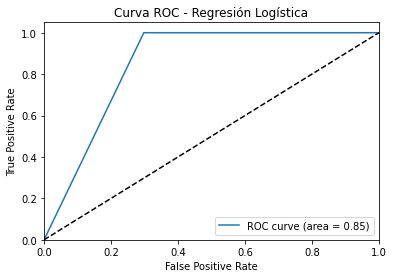

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()

Conclusion: podemos ver que el modelo de regresion logística da mucho mejor que un modelo vase (correcto el 50% de las veces). 

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
rf_model.fit(x_train_norm, y_train)

rf_valid_pred = rf_model.predict(x_test_norm)
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_valid_pred)
roc_auc = metrics.auc(fpr, tpr)
metrics.auc(fpr, tpr)

1.0

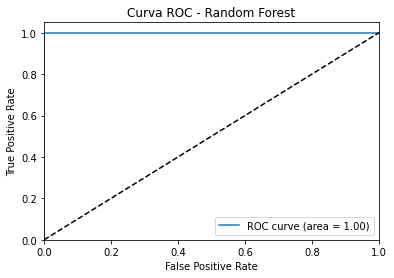

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

Conclusion: debe haber algo mal, porque lo que está pasando es que al testear el modelo, los resultados de los alumnos son categorizados correctamente el 100% de las veces. Es decir, sabiendo las caracteristicas de una alumno, se puede decir si aprueba (nota mayor o igual a 60) o desaprueba.


##Deep Learning (sin embeddings)

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model



In [ ]:
tf.test.gpu_device_name()

''

In [ ]:
tf.config.list_physical_devices('GPU') 

[]

In [ ]:
def create_model():
  # create model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(100))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(1))
  model.add(tf.keras.layers.Activation('sigmoid'))

  return model

model = create_model()

metrics = [tf.keras.metrics.AUC()]

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=metrics
)

model.fit(
    x_train_norm.astype(np.float32), 
    y_train.astype(np.float32),
    epochs=10,
    batch_size=64,
    validation_data=(x_test_norm, y_test),
)



Epoch 1/10
11/11 [==============================] - 1s 25ms/step - loss: 0.5187 - auc_4: 0.7180 - val_loss: 0.5329 - val_auc_4: 0.7628
Epoch 2/10
11/11 [==============================] - 0s 4ms/step - loss: 0.4582 - auc_4: 0.8038 - val_loss: 0.5468 - val_auc_4: 0.7915
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 0.4306 - auc_4: 0.8311 - val_loss: 0.4697 - val_auc_4: 0.8235
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3956 - auc_4: 0.8790 - val_loss: 0.4272 - val_auc_4: 0.8756
Epoch 5/10
11/11 [==============================] - 0s 5ms/step - loss: 0.3677 - auc_4: 0.8999 - val_loss: 0.4004 - val_auc_4: 0.9040
Epoch 6/10
11/11 [==============================] - 0s 5ms/step - loss: 0.3301 - auc_4: 0.9218 - val_loss: 0.4004 - val_auc_4: 0.9312
Epoch 7/10
11/11 [==============================] - 0s 5ms/step - loss: 0.2821 - auc_4: 0.9571 - val_loss: 0.3162 - val_auc_4: 0.9624
Epoch 8/10
11/11 [==============================] - 0s 4ms/st

In [ ]:
y_pred_keras = model.predict(x_test_norm,batch_size=64).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [ ]:
auc_keras = auc(fpr_keras, tpr_keras)

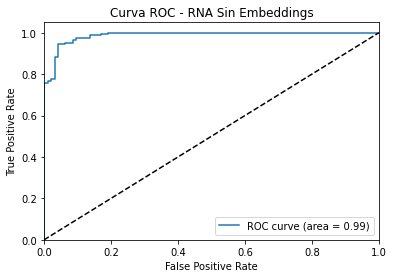

In [ ]:
plt.figure()
plt.plot(fpr_keras, tpr_keras, label='ROC curve (area = %0.2f)' % auc_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - RNA Sin Embeddings')
plt.legend(loc="lower right")
plt.show()

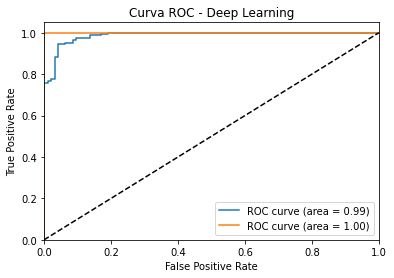

In [ ]:
plt.figure()
plt.plot(fpr_keras, tpr_keras, label='ROC curve (area = %0.2f)' % auc_keras)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Deep Learning')
plt.legend(loc="lower right")
plt.show()

Conclusion: La clasificacion en si aprueba o no da un éxito del 99,8%, por lo que el modelo puede predecir muy bien los resultados obtenidos por los alumnos.

##Clustering

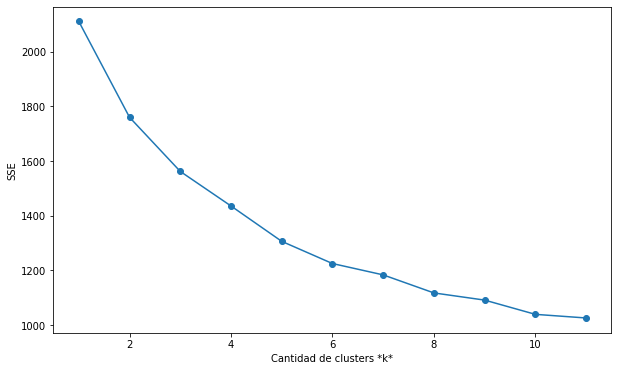

In [ ]:
from sklearn.cluster import KMeans


# Corro el algoritmo con K entre 2 y 12 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 12))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x_train_norm)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(10, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters *k*')
plt.ylabel('SSE');

###Conclusion: no se distingue un claro número de clusters a usar. Se eligen 2

In [ ]:
# Por defecto usa la distancia euclidea
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, random_state=0
)

In [ ]:
y_km = km.fit_predict(x_train_norm)

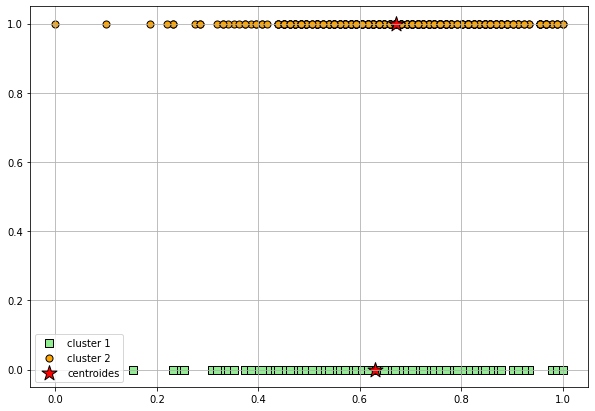

In [ ]:
#configuro el tamaño del grafico final
plt.figure(figsize=(10,7))

#scatter del primer cluster
plt.scatter(
    x_train_norm[y_km == 0, 0], x_train_norm[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
#scatter del segundo cluster
plt.scatter(
    x_train_norm[y_km == 1, 0], x_train_norm[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

#scatter del los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroides'
)
#le pongo la leyenda
plt.legend(scatterpoints=1)
#hace una grilla en el grafico
plt.grid()
#lo imprime en pantalla
plt.show()

No me queda claro por qué arma dos clusters en forma horizontal, y no se forma la "nube" de puntos. 